In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

In [2]:
data_location='/content/toyota.csv'
row_data = pd.read_csv(data_location)
row_data.shape

(6738, 9)

In [3]:
df = pd.read_csv('/content/toyota.csv')
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0
...,...,...,...,...,...,...,...,...,...
6733,IQ,2011,5500,Automatic,30000,Petrol,20,58.9,1.0
6734,Urban Cruiser,2011,4985,Manual,36154,Petrol,125,50.4,1.3
6735,Urban Cruiser,2012,4995,Manual,46000,Diesel,125,57.6,1.4
6736,Urban Cruiser,2011,3995,Manual,60700,Petrol,125,50.4,1.3


In [4]:
import seaborn as sns

In [5]:
print("5 Baris Pertama Data:")
print(row_data.head())

5 Baris Pertama Data:
   model  year  price transmission  mileage fuelType  tax   mpg  engineSize
0   GT86  2016  16000       Manual    24089   Petrol  265  36.2         2.0
1   GT86  2017  15995       Manual    18615   Petrol  145  36.2         2.0
2   GT86  2015  13998       Manual    27469   Petrol  265  36.2         2.0
3   GT86  2017  18998       Manual    14736   Petrol  150  36.2         2.0
4   GT86  2017  17498       Manual    36284   Petrol  145  36.2         2.0


In [6]:
print("\nInformasi Dataset:")
print(row_data.info())


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB
None


In [7]:
# Statistik deskriptif
print("\nStatistik Deskriptif:")
print(row_data.describe())



Statistik Deskriptif:
              year         price        mileage          tax          mpg  \
count  6738.000000   6738.000000    6738.000000  6738.000000  6738.000000   
mean   2016.748145  12522.391066   22857.413921    94.697240    63.042223   
std       2.204062   6345.017587   19125.464147    73.880776    15.836710   
min    1998.000000    850.000000       2.000000     0.000000     2.800000   
25%    2016.000000   8290.000000    9446.000000     0.000000    55.400000   
50%    2017.000000  10795.000000   18513.000000   135.000000    62.800000   
75%    2018.000000  14995.000000   31063.750000   145.000000    69.000000   
max    2020.000000  59995.000000  174419.000000   565.000000   235.000000   

        engineSize  
count  6738.000000  
mean      1.471297  
std       0.436159  
min       0.000000  
25%       1.000000  
50%       1.500000  
75%       1.800000  
max       4.500000  


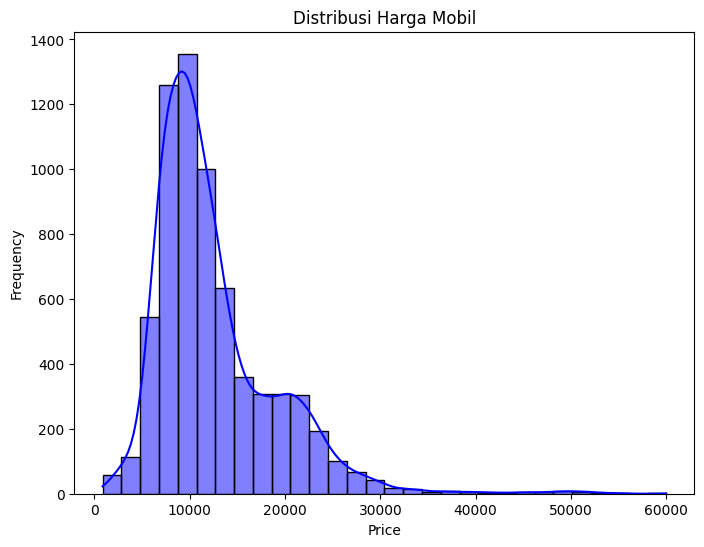

In [8]:
# Cek distribusi target (harga mobil)
plt.figure(figsize=(8, 6))
sns.histplot(row_data['price'], bins=30, kde=True, color='blue')
plt.title('Distribusi Harga Mobil')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

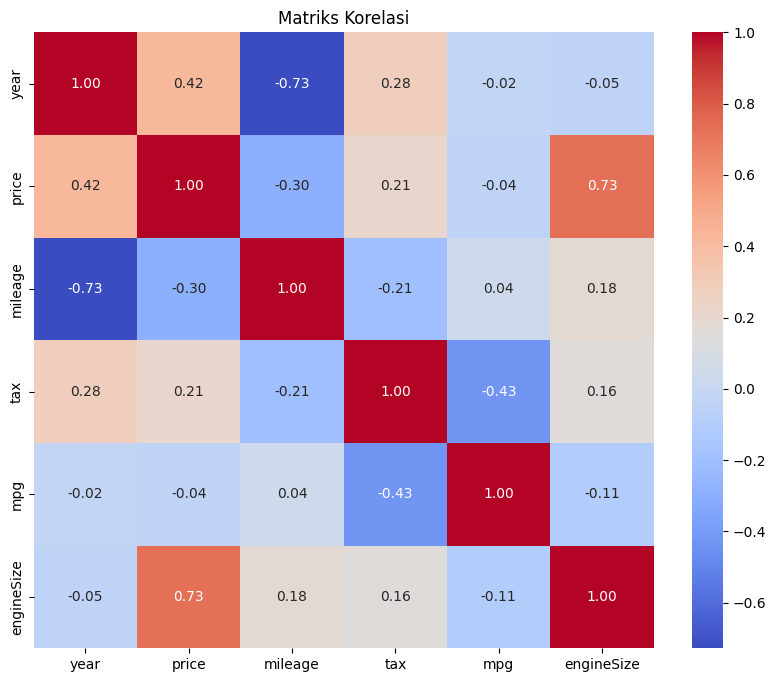

In [9]:
# Korelasi antar fitur
plt.figure(figsize=(10, 8))
# Calculate correlation only for numeric features
correlation_matrix = row_data.select_dtypes(include=np.number).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi')
plt.show()

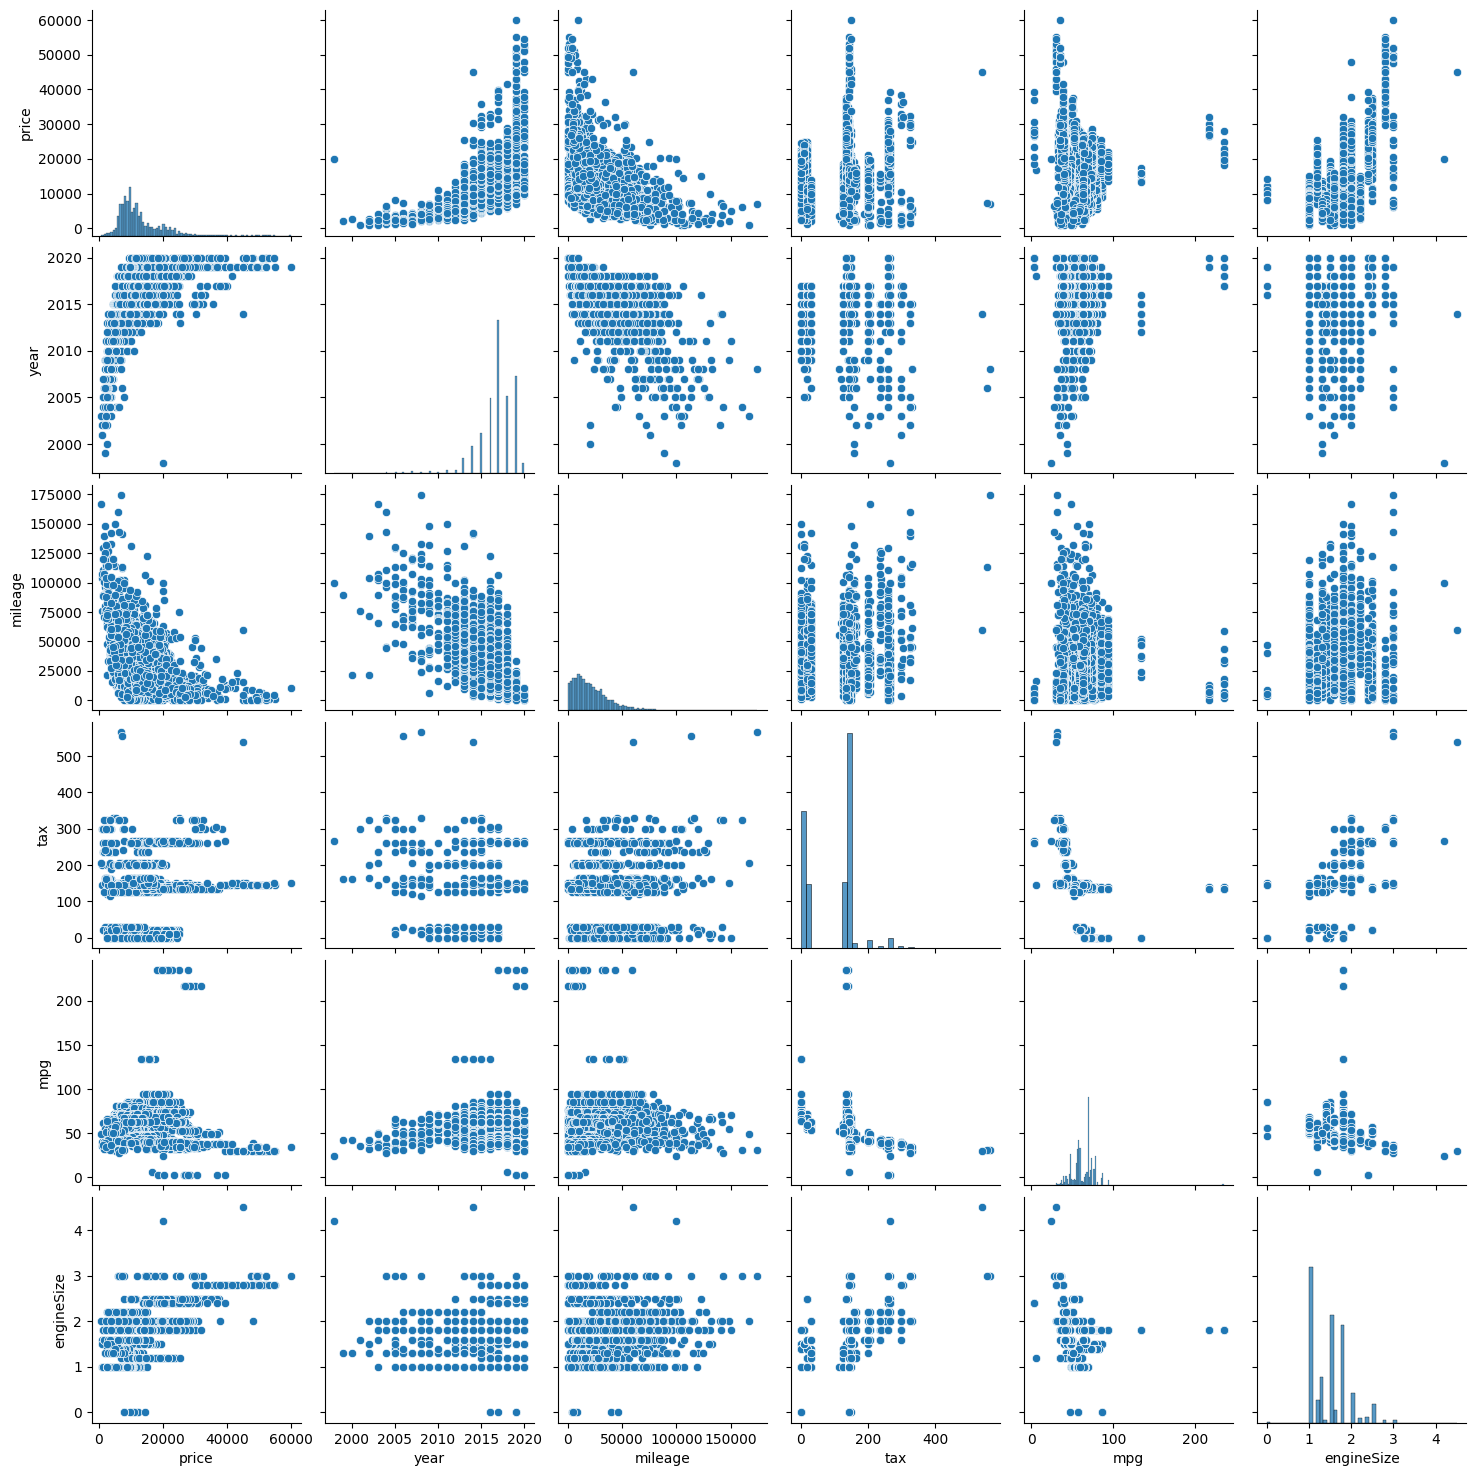

In [10]:
# Melihat hubungan fitur terhadap harga (pairplot)
selected_features = ['price', 'year', 'mileage', 'tax', 'mpg', 'engineSize']
sns.pairplot(row_data[selected_features])
plt.show()

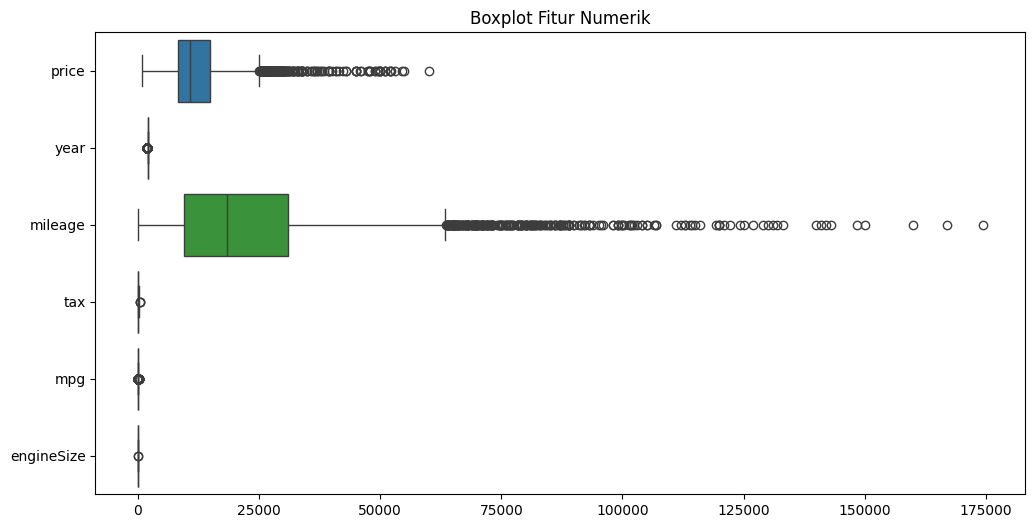

In [11]:
# Cek outlier pada fitur numerik
plt.figure(figsize=(12, 6))
sns.boxplot(data=row_data[selected_features], orient="h")
plt.title('Boxplot Fitur Numerik')
plt.show()

In [12]:
data = row_data.dropna(axis=0)
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
mean,2016.748145,12522.391066,22857.413921,94.697240,63.042223,1.471297
std,2.204062,6345.017587,19125.464147,73.880776,15.836710,0.436159
min,1998.000000,850.000000,2.000000,0.000000,2.800000,0.000000
25%,2016.000000,8290.000000,9446.000000,0.000000,55.400000,1.000000
50%,2017.000000,10795.000000,18513.000000,135.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31063.750000,145.000000,69.000000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000


In [13]:
print (row_data.dtypes)

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object


In [14]:
features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
x = data[features]  # Data fitur
y = data['price']   # Target
print("Shape x:", x.shape)
print("Shape y:", y.shape)

Shape x: (6738, 5)
Shape y: (6738,)


In [15]:
# 4. Cek Missing Values
print("Missing Values:")
print(data.isnull().sum())

# Mengisi nilai kosong jika ada
x = x.fillna(x.mean())
y = y.fillna(y.mean())

Missing Values:
model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64


In [16]:
# 5. Normalisasi Data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

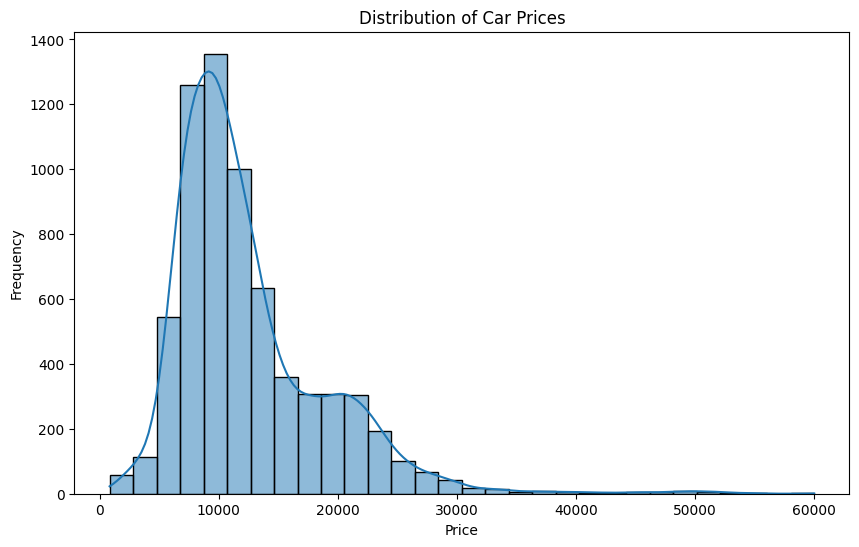

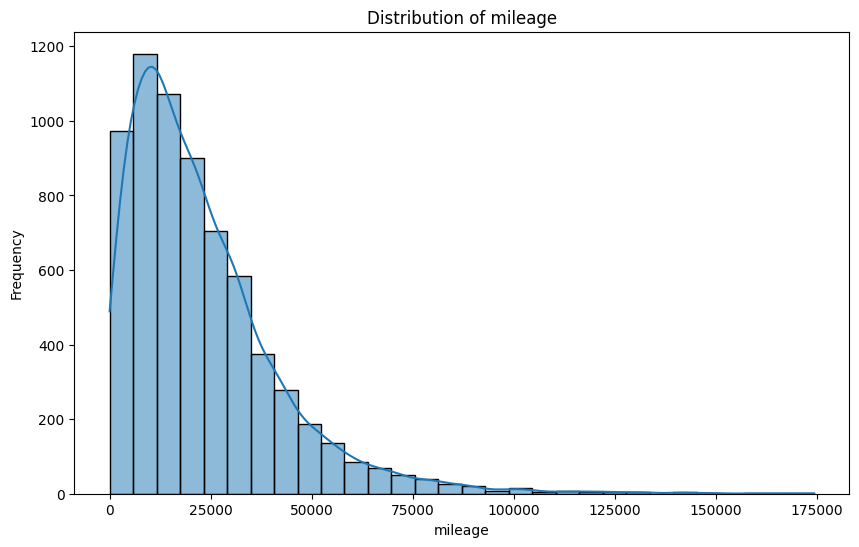

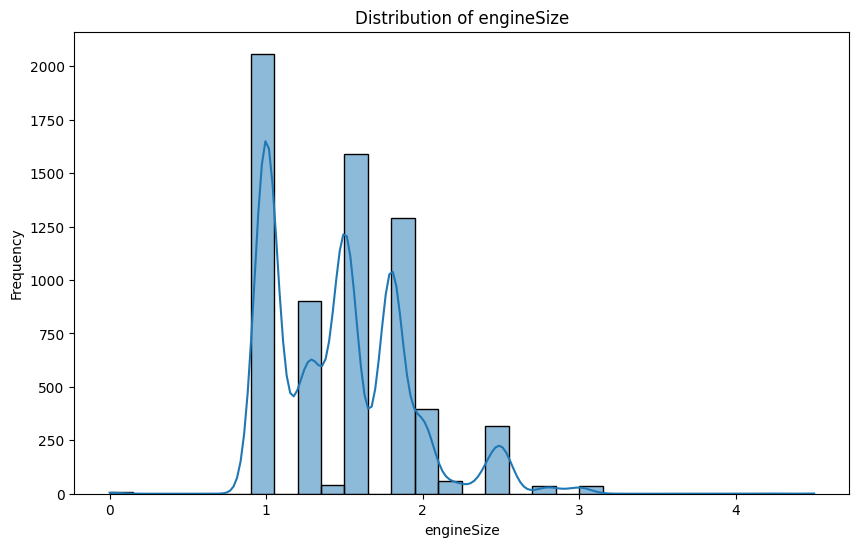

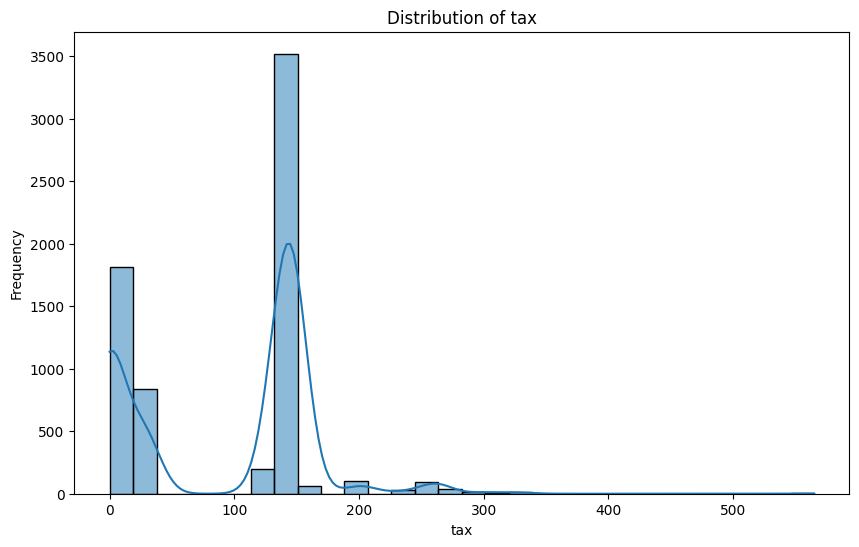

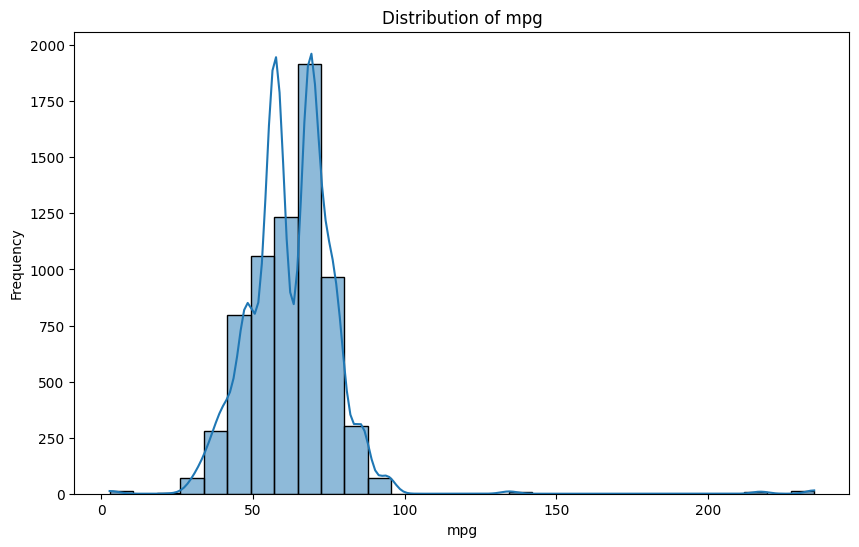

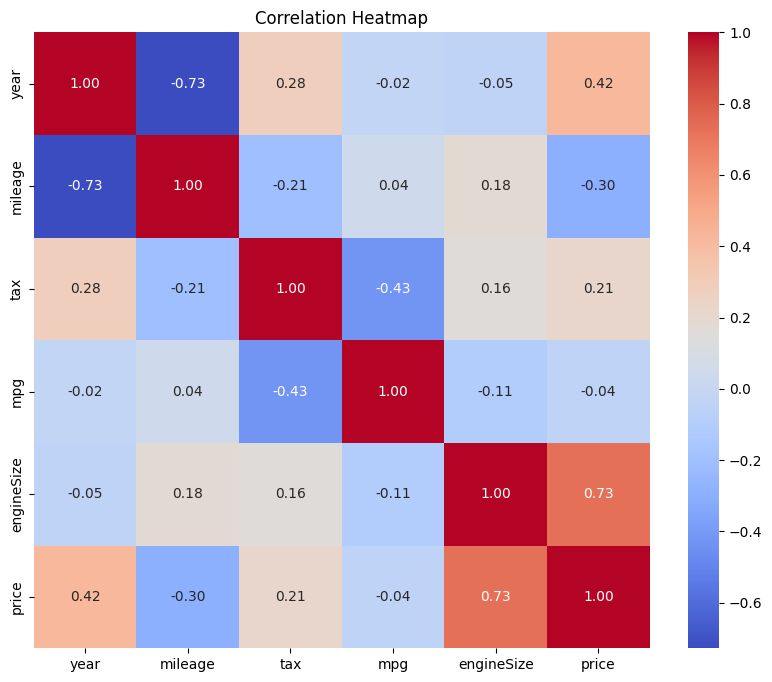

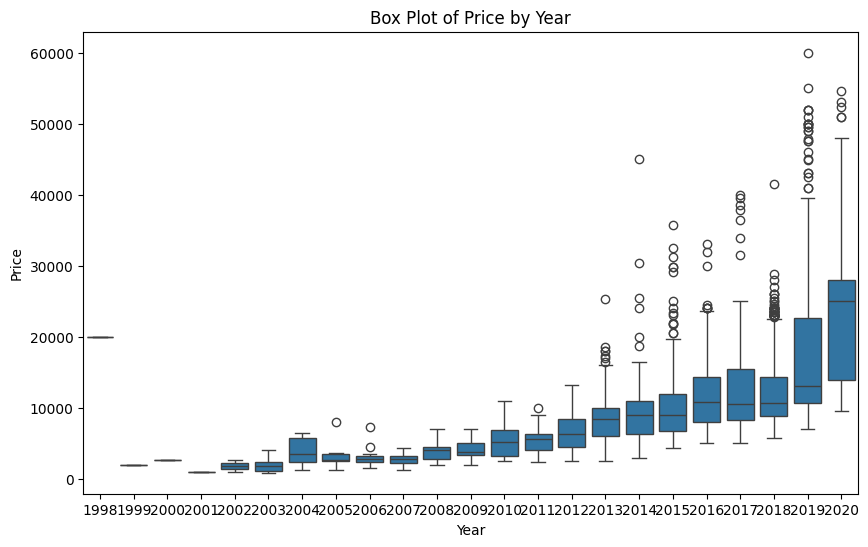

In [17]:
# EDA Section
# Visualize the distribution of the target variable (price)
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=30, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of key features
features_to_plot = ['mileage', 'engineSize', 'tax', 'mpg']
for feature in features_to_plot:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Create a correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data[features + ['price']].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

# Box plots for categorical features against the target variable
plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='price', data=data)
plt.title('Box Plot of Price by Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x_scaled, y, test_size=0.2, random_state=70)

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse

# Menggunakan 100 trees (default)
model = RandomForestRegressor(n_estimators=100, random_state=70)
model.fit(train_x, train_y)

RandomForestRegressor(random_state=70)

In [20]:
# Prediksi pada data uji
test_predict = model.predict(test_x)

In [21]:
# Evaluasi Model
train_score = model.score(train_x, train_y)  # R² pada data train
test_score = model.score(test_x, test_y)    # R² pada data test
test_predict = model.predict(test_x)

[[641  33]
 [ 47 627]]


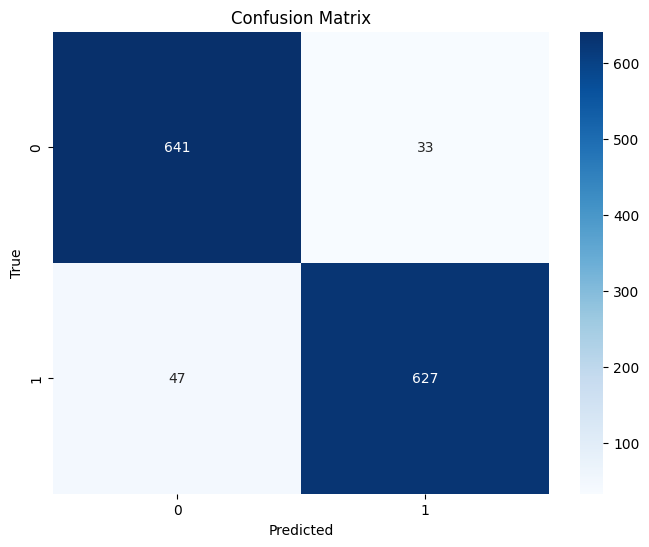

In [22]:
# Import the necessary library
from sklearn.metrics import confusion_matrix

# Define a threshold
threshold = np.median(test_y)  # Example: Using the median price as a threshold
predicted_classes = (test_predict >= threshold).astype(int)
true_classes = (test_y >= threshold).astype(int)

# Now create the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Display the confusion matrix
print(cm)

# Visualization using seaborn (optional)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [23]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error, r2_score

mse_score = mean_squared_error(test_y, test_predict)

In [24]:
print("Evaluasi Model:")
print(f"R² (Train): {train_score:.4f}")
print(f"R² (Test): {test_score:.4f}")
print(f"MSE (Test): {mse_score:.4f}")

Evaluasi Model:
R² (Train): 0.9931
R² (Test): 0.9550
MSE (Test): 1695730.7567


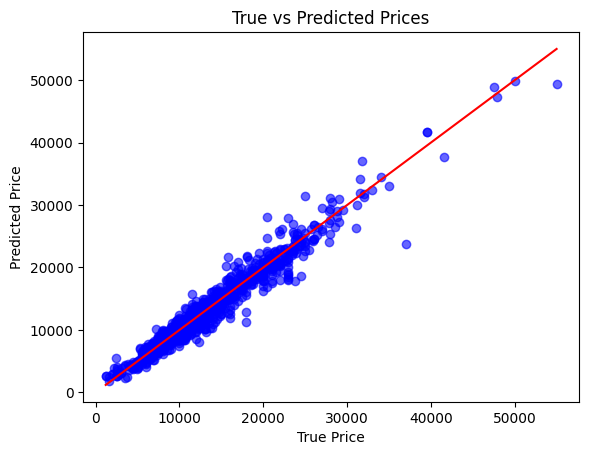

In [25]:
# Plot hasil prediksi vs nilai sebenarnya
plt.scatter(test_y, test_predict, color='blue', alpha=0.6)
plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], color='red')  # Garis sempurna
plt.title('True vs Predicted Prices')
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.show()

In [26]:
import joblib

# Save the model to a file
filename = 'toyota_model.sav'
joblib.dump(model, filename)
print(f"Model saved to {filename}")

Model saved to toyota_model.sav


In [27]:
from joblib import dump
dump(scaler, 'scaler.sav')

['scaler.sav']

In [28]:
import numpy as np
import joblib

# Load the saved model and scaler
loaded_model = joblib.load('toyota_model.sav')
scaler = joblib.load('scaler.sav')  # Jika Anda menggunakan scaler, simpan juga saat training

# Input the data manually
year = int(input("Enter the year of the car: "))
mileage = int(input("Enter the mileage of the car: "))
tax = int(input("Enter the tax of the car: "))
mpg = float(input("Enter the mpg of the car: "))
engineSize = float(input("Enter the engine size of the car: "))

# Create a numpy array for the input data
input_data = np.array([[year, mileage, tax, mpg, engineSize]])

# Preprocess the input data (scaling, jika digunakan)
input_data_scaled = scaler.transform(input_data)  # Sesuaikan jika scaling digunakan

# Make a prediction
prediction = loaded_model.predict(input_data_scaled)  # Gunakan data yang telah diproses

# Print the prediction
print(f"Predicted price: £{prediction[0]:,.2f}")
print(f"Predicted price in Rupiah: Rp{prediction[0] * 19110:,.2f}")


Enter the year of the car: 1985
Enter the mileage of the car: 900
Enter the tax of the car: 5
Enter the mpg of the car: 30
Enter the engine size of the car: 2500
Predicted price: £17,676.45
Predicted price in Rupiah: Rp337,796,959.50


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [29]:
import numpy as np
import joblib

# Load the saved model and scaler
loaded_model = joblib.load('toyota_model.sav')
scaler = joblib.load('scaler.sav')  # Jika Anda menggunakan scaler, simpan juga saat training

# Input the data manually
year = int(input("Enter the year of the car: "))
mileage = int(input("Enter the mileage of the car: "))
tax = int(input("Enter the tax of the car: "))
mpg = float(input("Enter the mpg of the car: "))
engineSize = float(input("Enter the engine size of the car: "))

# Create a numpy array for the input data
input_data = np.array([[year, mileage, tax, mpg, engineSize]])

# Preprocess the input data (scaling, jika digunakan)
input_data_scaled = scaler.transform(input_data)  # Sesuaikan jika scaling digunakan

# Make a prediction
prediction = loaded_model.predict(input_data_scaled)  # Gunakan data yang telah diproses

# Print the prediction
print(f"Predicted price: £{prediction[0]:,.2f}")
print(f"Predicted price in Rupiah: Rp{prediction[0] * 19110:,.2f}")


Enter the year of the car: 2024
Enter the mileage of the car: 500
Enter the tax of the car: 150
Enter the mpg of the car: 17
Enter the engine size of the car: 2500
Predicted price: £49,665.33
Predicted price in Rupiah: Rp949,104,456.30


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
